Farhan Gunadi (140810190009)

Aghniya Abdurrahman Mannan (140810190025)

Bagas Adi Firdaus          140810190037

Muhammad Alwan Fauzi       140810190077

# Students Performance Dataset: EDA, Data Visualisation, and Classification

## Students Performance Dataset: Simple Exploratory Data Analysis (EDA)

#### Import Modules

In [1]:
import pandas as pd # olah dan analisis data

#### Load dataset

In [2]:
student_df = pd.read_csv('./dataset/StudentsPerformance.csv') # memuat file csv sebagai data framestudent_df.head() # tampilkan 5 baris pertama

,Id,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,1,female,group B,bachelor's degree,none,72,72,74
1,2,female,group C,some college,completed,69,90,88
2,3,female,group B,master's degree,none,90,95,93
3,4,male,group A,associate's degree,none,47,57,44
4,5,male,group C,some college,none,76,78,75


#### Drop column 'Id'

In [3]:
# student_df = student_df.drop(columns='Id')
student_df.drop(columns='Id', inplace=True) # menghapus kolom bernama 'Id'
student_df.head() # tampilkan 5 baris pertama

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75


#### Identify the shape of the datatset

In [4]:
student_df.shape # bentuk/dimensi dataset (baris,kolom)

(1000, 7)

#### Get the list of columns

In [5]:
student_df.columns # daftar nama kolom

Index(['gender', 'race/ethnicity', 'parental level of education',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

#### Identify data types for each column

In [6]:
student_df.dtypes # tipe data untuk tiap kolom

gender                         object
race/ethnicity                 object
parental level of education    object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

#### Get bassic dataset information

In [7]:
student_df.info() # informasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   test preparation course      1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


#### Identify missing values

In [8]:
# student_df.isnull().values.any()
student_df.isna().values.any() # mendeteksi keberadaan nilai kosong

False

#### Identify duplicate entries/rows

In [9]:
# student_df[student_df.duplicated(keep=False)] # tampilkan seluruh baris dengan duplikasi
student_df[student_df.duplicated()] # tampilkan hanya baris duplikasi sekunder

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
613,female,group C,associate's degree,none,65,77,74


In [10]:
student_df.duplicated().value_counts() # hitung jumlah duplikasi data

False    999
True       1
dtype: int64

#### Drop duplicate entries/rows

In [11]:
student_df.drop_duplicates(inplace=True) # menghapus duplikasi data
student_df.shape

(999, 7)

#### Describe the dataset

In [12]:
student_df.describe() # deskripsi data

,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,66.090090,69.161161,68.048048
std,15.170636,14.605399,15.202102
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.500000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


#### Correlation Matrix

In [13]:
student_df.corr() # korelasi antar kolom

,math score,reading score,writing score
math score,1.000000,0.817738,0.802734
reading score,0.817738,1.000000,0.954599
writing score,0.802734,0.954599,1.000000


## Iris Dataset: Data Visualisation

#### Import Modules

In [14]:
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

# output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline 

#### Heatmap

<AxesSubplot:>

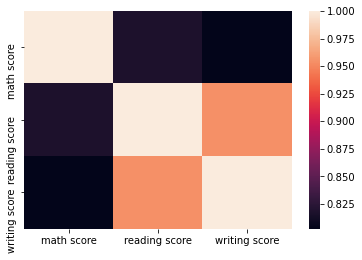

In [15]:
sns.heatmap(data=student_df.corr())

#### Bar Plot

In [16]:
student_df['gender'].value_counts() # menghitung jumlah setiap gender

female    517
male      482
Name: gender, dtype: int64

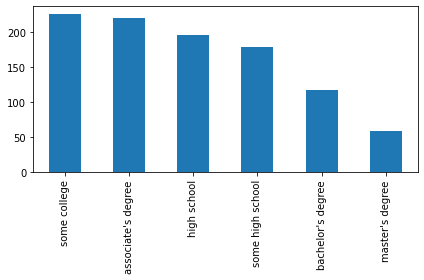

In [17]:
student_df['parental level of education'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

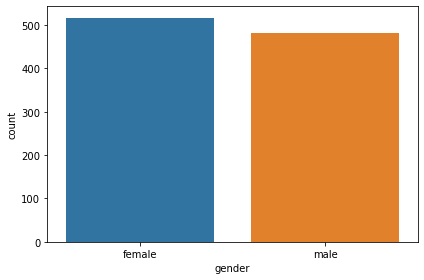

In [18]:
sns.countplot(data=student_df, x='gender')
plt.tight_layout()
# sns.countplot?

#### Pie Chart

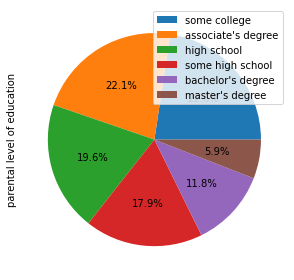

In [19]:
student_df['parental level of education'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

#### Line Plot

Text(0.5, 1.0, 'Writing Score')

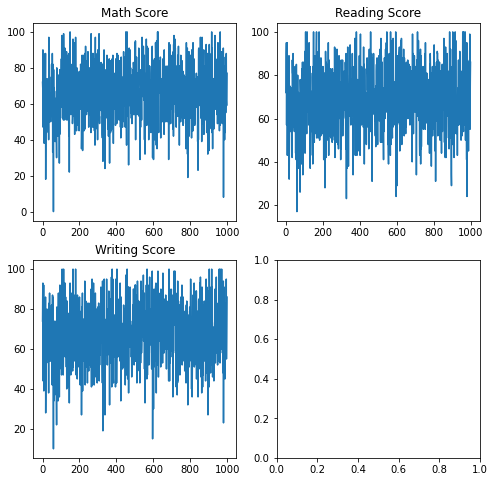

In [20]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

student_df['math score'].plot.line(ax=ax[0][0])
ax[0][0].set_title('Math Score')

student_df['reading score'].plot.line(ax=ax[0][1])
ax[0][1].set_title('Reading Score')

student_df['writing score'].plot.line(ax=ax[1][0])
ax[1][0].set_title('Writing Score')

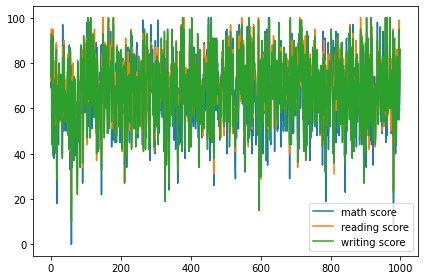

In [21]:
student_df.plot()
plt.tight_layout()

#### Histogram

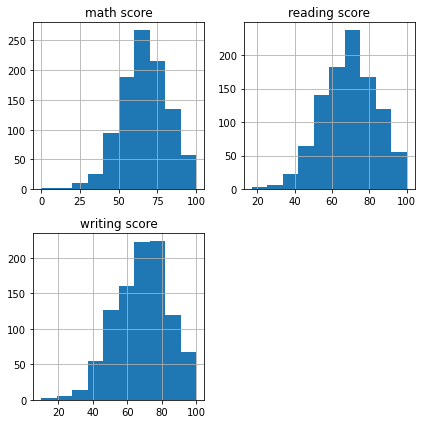

In [22]:
student_df.hist(figsize=(6,6), bins=10)
plt.tight_layout()

#### Boxplot

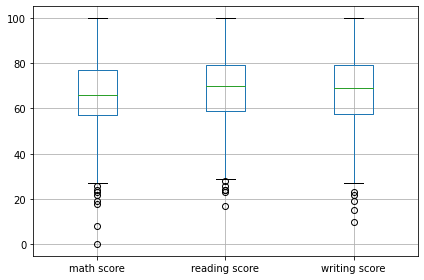

In [23]:
student_df.boxplot()
plt.tight_layout()

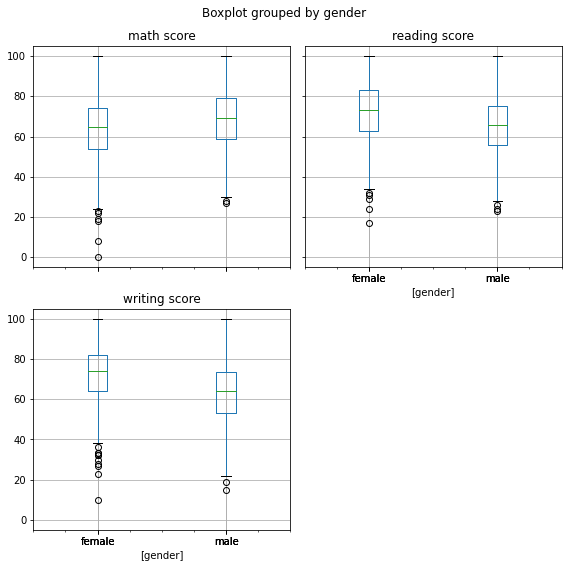

In [24]:
student_df.boxplot(by="gender", figsize=(8,8))
plt.tight_layout()

#### Scatter Plot

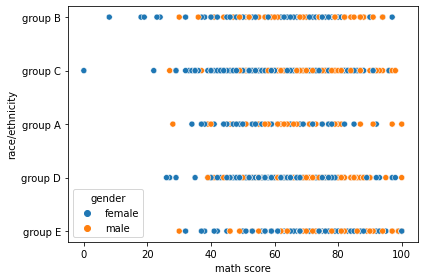

In [25]:
sns.scatterplot(x='math score', y='race/ethnicity', data=student_df, hue='gender')
plt.tight_layout()

#### Pair Plot

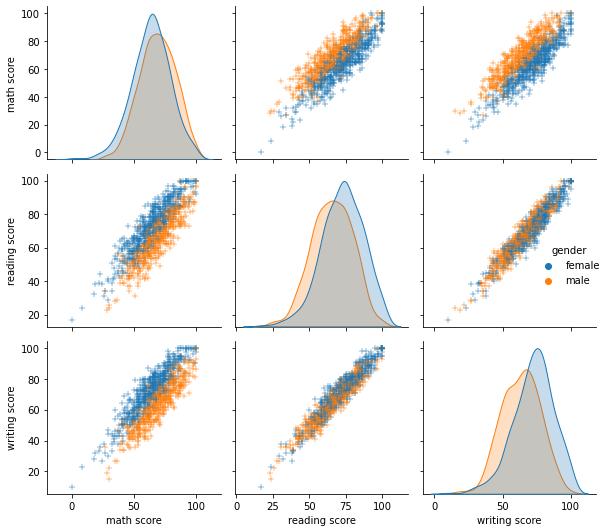

In [26]:
sns.pairplot(student_df, hue='gender', markers='+')
plt.tight_layout()

#### Violin Plot

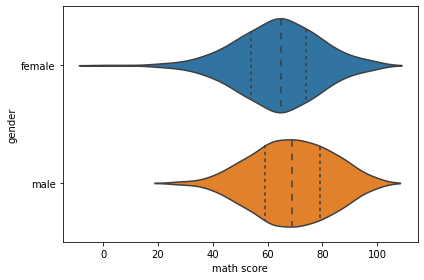

In [27]:
sns.violinplot(data=student_df, y='gender', x='math score', inner='quartile')
plt.tight_layout()

## Iris Dataset: Classification Models

#### Import Modules

In [28]:
from sklearn.model_selection import train_test_split # pembagi dataset menjadi training dan testing set
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # evaluasi performa model

#### Dataset: Features & Class Label

In [36]:
X = student_df.drop(columns=["gender","race/ethnicity","parental level of education","test preparation course"]) # menempatkan features ke dalam variable X
X.head() # tampilkan 5 baris pertama

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [37]:
y = student_df['gender'] # menempatkan class label (target) ke dalam variabel y
y.head() # tampilkan 5 baris pertama

0    female
1    female
2    female
3      male
4      male
Name: gender, dtype: object

#### Split the dataset into a training set and a testing set

In [38]:
# membagi dataset ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset
(599, 3)
(599,)

testing dataset:
(400, 3)
(400,)


#### K Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # konfigurasi algoritma
    model_knn.fit(X_train, y_train) # training model/classifier
    y_pred = model_knn.predict(X_test) # melakukan prediksi
    scores.append(accuracy_score(y_test, y_pred)) # evaluasi performa

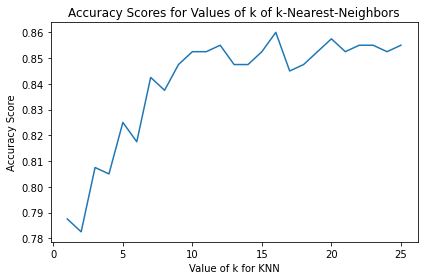

In [41]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [42]:
model_knn = KNeighborsClassifier(n_neighbors=3) # konfigurasi algoritma
model_knn.fit(X_train,y_train) # training model/classifier
y_pred = model_knn.predict(X_test) # melakukan prediksi

##### Accuracy Score

In [43]:
print(accuracy_score(y_test, y_pred)) # evaluasi akurasi

0.8075


##### Confusion Matrix

In [44]:
print(confusion_matrix(y_test, y_pred)) # evaluasi confusion matrix

[[152  41]
 [ 36 171]]


##### Classification Report

In [45]:
print(classification_report(y_test, y_pred)) # evaluasi klasifikasi

              precision    recall  f1-score   support

      female       0.81      0.79      0.80       193
        male       0.81      0.83      0.82       207

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



#### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
# model_logreg = LogisticRegression()
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

##### Accuracy Score

In [48]:
print(accuracy_score(y_test, y_pred))

0.875


##### Confusion Matrix

In [49]:
print(confusion_matrix(y_test, y_pred))

[[174  19]
 [ 31 176]]


##### Classification Report

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      female       0.85      0.90      0.87       193
        male       0.90      0.85      0.88       207

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.87       400
weighted avg       0.88      0.88      0.88       400



#### Support Vector Classifier

In [51]:
from sklearn.svm import SVC

In [52]:
# model_svc = SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

#### Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

#### Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
# model_rf = RandomForestClassifier()
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

#### Accuracy comparision for various models.

In [57]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.8075, 0.875, 0.8775, 0.8025, 0.8175]


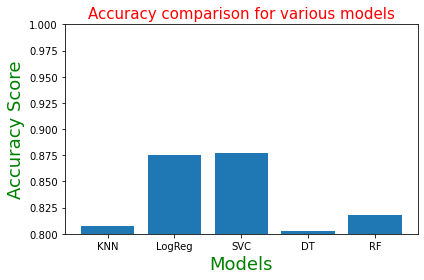

In [60]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF'],accuracy_scores)
plt.ylim(0.80,1.00)
plt.title('Accuracy comparison for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()

## Study References
### (In Indonesian)
### Struktur Data bawaan (built-in) pada pemrograman Python

In [ ]:
YouTubeVideo('3Og1xO15HhQ')

### Pythonic: Penulisan kode Python yang idiomatic

In [ ]:
YouTubeVideo('BHP3J8akr74')

### HackerRank: Latihan soal pemrograman Python

In [ ]:
YouTubeVideo('kwlRZUjzsns')

### Statistika Deskriptif

In [ ]:
YouTubeVideo('el7Ezn9PpWU')